fiftyone.yml:   0%|          | 0.00/129 [00:00<?, ?B/s]

Loading dataset
Importing samples...
 100% |█████████████| 10000/10000 [286.2ms elapsed, 0s remaining, 35.1K samples/s]      



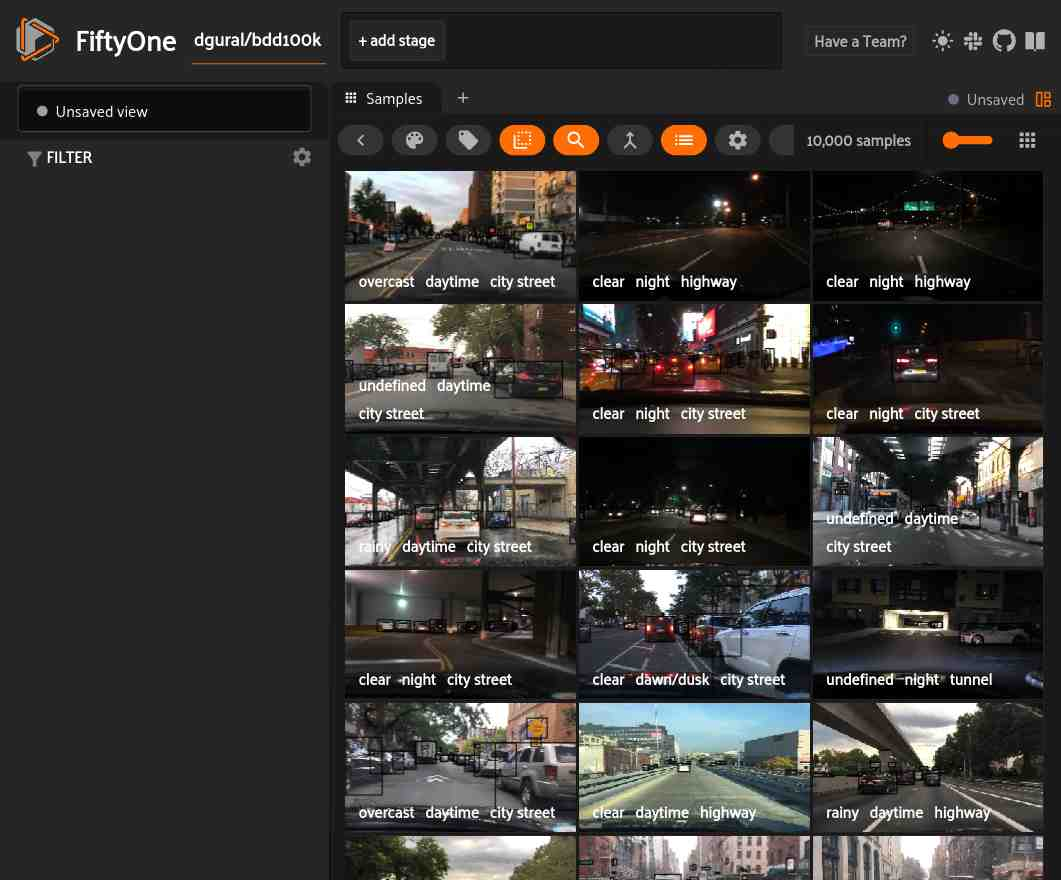

In [1]:
import fiftyone as fo
import fiftyone.zoo as foz
import fiftyone.utils.huggingface as fouh

dataset = fouh.load_from_hub("dgural/bdd100k")

session = fo.launch_app(dataset)

In [6]:
import fiftyone.brain as fob

results = fob.compute_visualization(
    dataset,
    model="clip-vit-base32-torch",
    brain_key="img_viz",
)

Computing embeddings...
 100% |███████████████| 8922/8922 [39.8s elapsed, 0s remaining, 290.0 samples/s]      
Generating visualization...
UMAP( verbose=True)
Sat Apr 27 15:59:17 2024 Construct fuzzy simplicial set
Sat Apr 27 15:59:17 2024 Finding Nearest Neighbors
Sat Apr 27 15:59:17 2024 Building RP forest with 10 trees
Sat Apr 27 15:59:17 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	Stopping threshold met -- exiting after 5 iterations
Sat Apr 27 15:59:18 2024 Finished Nearest Neighbor Search
Sat Apr 27 15:59:18 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Apr 27 15:59:24 2024 Finished embedding
